Task_1:-Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population. 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv(r"F:\prasunet\Task_1\Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_1584446.csv")

In [6]:
df

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...,NaN


In [8]:
df.columns

Index(['INDICATOR_CODE', 'INDICATOR_NAME', 'SOURCE_NOTE',
       'SOURCE_ORGANIZATION', 'Unnamed: 4'],
      dtype='object')

In [12]:
# Count the frequency of each unique indicator
indicator_counts = df['INDICATOR_NAME'].value_counts()

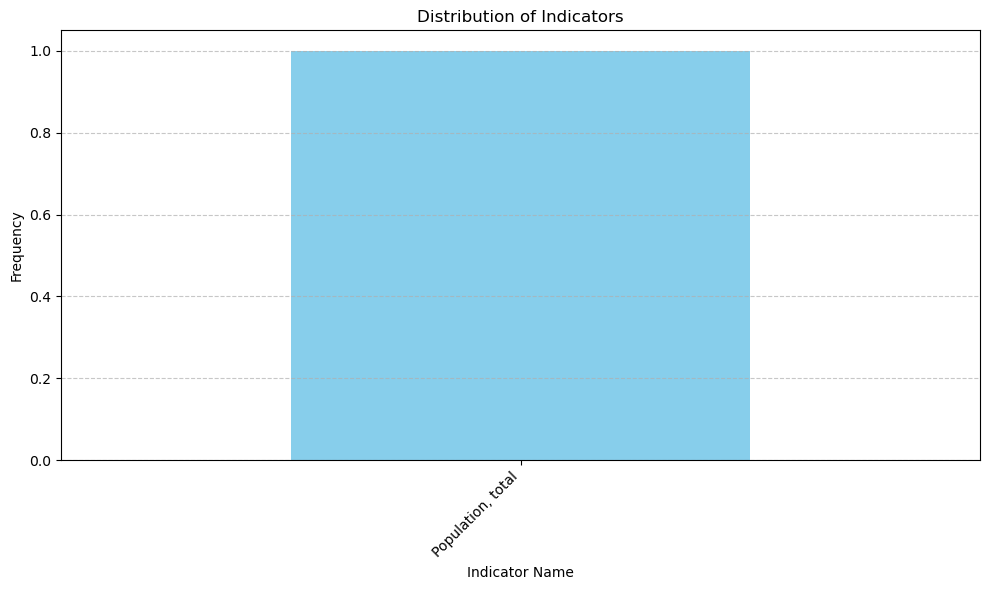

In [14]:
# Plotting
plt.figure(figsize=(10, 6))
indicator_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Indicators')
plt.xlabel('Indicator Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Task_2:-Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [32]:
df = pd.read_csv(r"F:\prasunet\datasets\gender_submission.csv")

In [34]:
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [36]:
df.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [38]:
df.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [40]:
df.isnull()

,PassengerId,Survived
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
413,False,False
414,False,False
415,False,False
416,False,False


In [44]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [46]:
# Count the number of survivors and non-survivors
survival_counts = df['Survived'].value_counts()

In [52]:
# Print survival statistics
survived_std = df['Survived'].std()
survived_std

0.48162214093223055

C:\Users\santo\AppData\Local\Temp\ipykernel_9712\2240270201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='viridis')


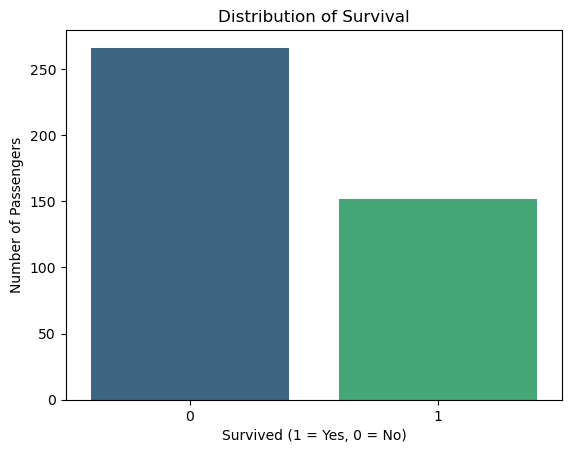

In [60]:
# Visualize the survival distribution
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Distribution of Survival')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Number of Passengers')
plt.show()

Task_3:-Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [77]:
df = pd.read_csv(r"F:\prasunet\datasets\bank\bank.csv",sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [79]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [81]:
# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [83]:
# Define features and target variable
X = df.drop(columns='y')
y = df['y']

In [85]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [89]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [91]:
from sklearn.tree import plot_tree

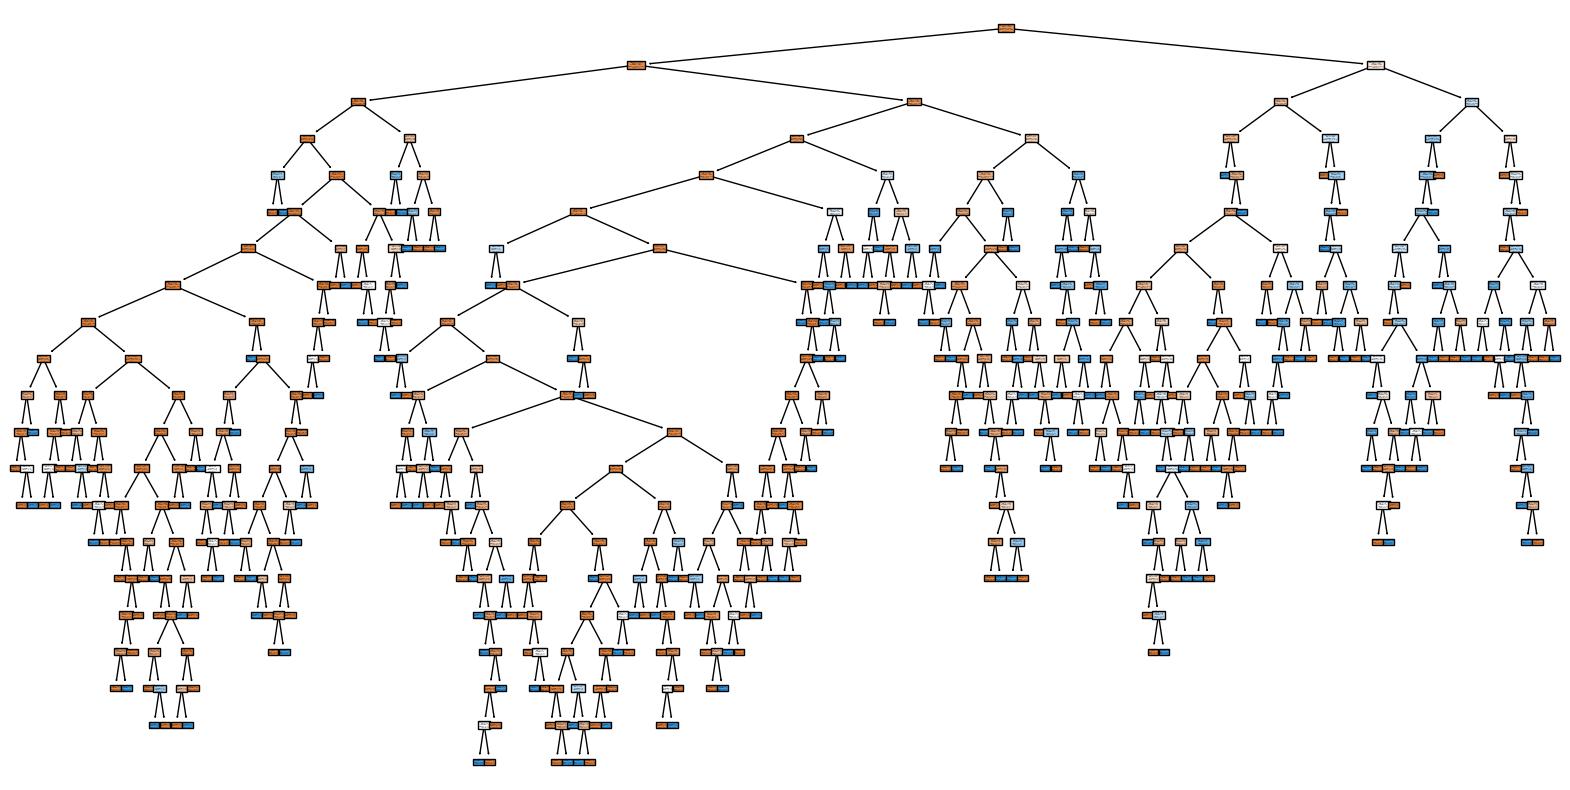

In [93]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()

Task_4:-Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [95]:
df=pd.read_csv(r"F:\prasunet\datasets\twitter_training.csv")

In [97]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [105]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [111]:
# Ensure column names are correctly assigned
df.columns = ['id', 'title', 'sentiment', 'text']

In [117]:
# Clean column names
df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces

In [119]:
df['sentiment'] = df['sentiment'].astype('category')

C:\Users\santo\AppData\Local\Temp\ipykernel_9712\2198444156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


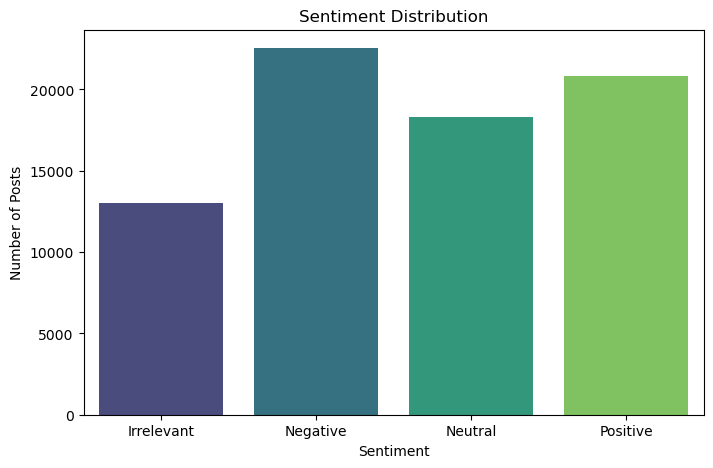

In [121]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()

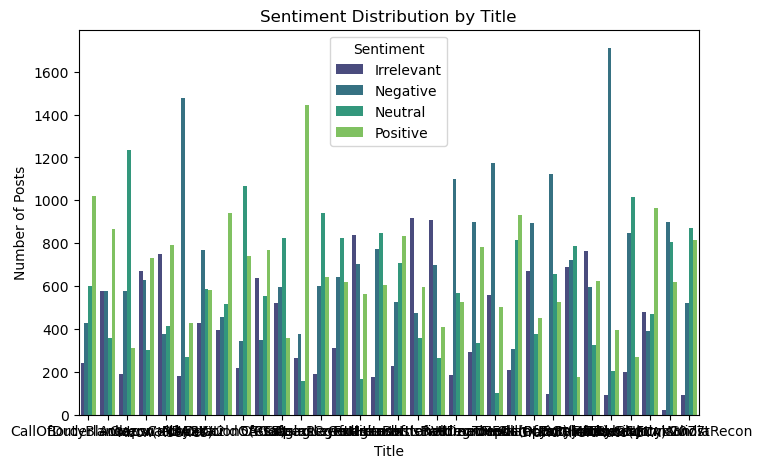

In [123]:
# Optional: Visualize sentiment by title or any other feature
plt.figure(figsize=(8, 5))
sns.countplot(x='title', hue='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution by Title')
plt.xlabel('Title')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment')
plt.show()

Task_5:-Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [135]:
file_path = r"F:\prasunet\datasets\US_Accidents_March23.csv"

try:
    df = pd.read_csv(file_path)
    print(df.head())
except PermissionError as e:
    print(f"Permission error: {e}")
except FileNotFoundError as e:
    print(f"File not found: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

Permission error: [Errno 13] Permission denied: 'F:\\prasunet\\datasets\\US_Accidents_March23.csv'


In [137]:
df.columns

Index(['id', 'title', 'sentiment', 'text'], dtype='object')

In [139]:
# Drop columns not needed for analysis
df = df[['title', 'sentiment', 'text']]

In [142]:
# Handle missing values
df.dropna(inplace=True)

C:\Users\santo\AppData\Local\Temp\ipykernel_9712\1847245051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   title      73995 non-null  object  
 1   sentiment  73995 non-null  category
 2   text       73995 non-null  object  
dtypes: category(1), object(2)
memory usage: 1.8+ MB


In [149]:
df.describe()

,title,sentiment,text
count,73995,73995,73995
unique,32,4,69490
top,MaddenNFL,Negative,
freq,2377,22358,172


In [151]:
# Example of text preprocessing (if needed)
df['text_cleaned'] = df['text'].str.lower()  # Convert to lowercase

C:\Users\santo\AppData\Local\Temp\ipykernel_9712\2834407713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_cleaned'] = df['text'].str.lower()  # Convert to lowercase


In [153]:
# Example of basic sentiment analysis (if not already done)
# Assuming 'sentiment' column has values like 'Positive', 'Negative', 'Neutral'
print(df['sentiment'].value_counts())

sentiment
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64


C:\Users\santo\AppData\Local\Temp\ipykernel_9712\710946554.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


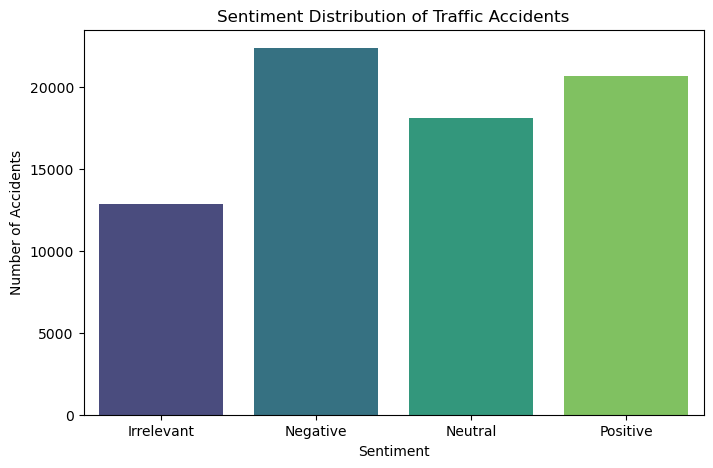

In [155]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution of Traffic Accidents')
plt.xlabel('Sentiment')
plt.ylabel('Number of Accidents')
plt.show()